# Vizuelizacija eksperimenata

## Surprise modeli


In [1]:
import pandas as pd
import seaborn as sns


DIR = "results"

sizes = [20, 50, 100, 200]
df = pd.DataFrame()
for size in sizes:
    tmp = pd.read_csv(f"{DIR}/ranking_rec_res_{size}.csv").rename(
        columns=lambda x: f"{size}_{x}"
    )
    tmp = tmp.loc[:, ~tmp.columns.str.contains(".*Unnamed.*")]

    tmp = tmp.melt()
    df = tmp if df.empty else pd.concat([df, tmp])

    tmp = pd.read_csv(f"{DIR}/loo_rec_res_{size}.csv").rename(
        columns=lambda x: f"{size}_{x}"
    )
    tmp = tmp.loc[:, ~tmp.columns.str.contains(".*Unnamed.*")]

    df = tmp if df.empty else pd.concat([df, tmp])
df = df.reset_index()
df[["threshold", "model", "metric"]] = df.variable.str.split("_", expand=True)

df = df.drop(columns="variable")
df[["metric", "@k"]] = df["metric"].str.extract(r"(.)(.*)")
df["@k"] = pd.to_numeric(df["@k"], errors="coerce")
df.loc[df["@k"].isna(), "metric"] = df.loc[
    df["@k"].isna(), "metric"
]

#df = df.drop(columns="metric")
df.loc[df["metric"] == "r", "metric"] = "recall"
df.loc[df["metric"] == "p", "metric"] = "precision"
df


,index,value,20_random_arhr,20_random_hr@1,20_random_hr@5,20_random_hr@10,20_random_hr@20,20_baseline_arhr,20_baseline_hr@1,20_baseline_hr@5,...,200_knn_hr@20,200_normal_arhr,200_normal_hr@1,200_normal_hr@5,200_normal_hr@10,200_normal_hr@20,threshold,model,metric,@k
0,0,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,random,f,NaN
1,1,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,random,f,NaN
2,2,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,random,f,NaN
3,3,0.000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,random,f,NaN
4,4,0.000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,random,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041420,0.006542,0.0,0.000000,0.023669,0.053254,NaN,NaN,NaN,NaN
1216,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082418,0.004843,0.0,0.005495,0.010989,0.021978,NaN,NaN,NaN,NaN
1217,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.023810,0.005410,0.0,0.000000,0.011905,0.047619,NaN,NaN,NaN,NaN
1218,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.088757,0.003703,0.0,0.000000,0.011834,0.023669,NaN,NaN,NaN,NaN


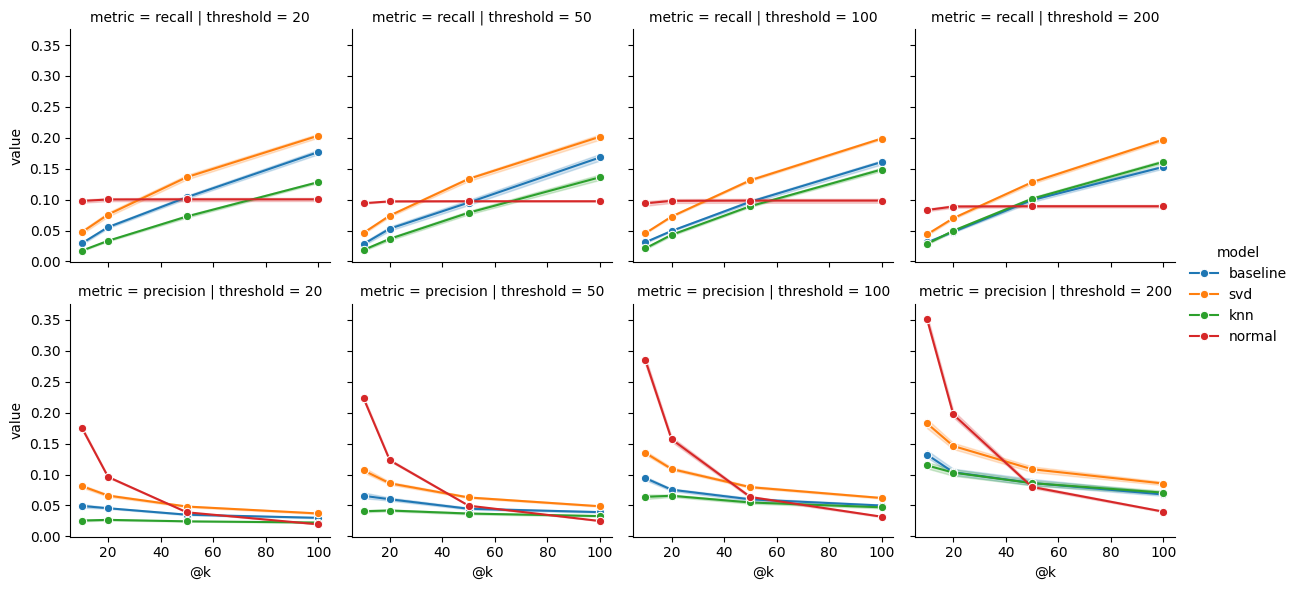

In [19]:
metric_names = ["recall", "precision"]
models = ["baseline", "knn", "svd", "normal"]
data = df.loc[df.model.isin(models) & df.metric.isin(metric_names)]
g = sns.FacetGrid(data, row="metric", col="threshold", hue="model")
g.map(sns.lineplot, "@k", "value", marker="o").add_legend()


In [20]:
metric_names = ["hr"]
models = ["baseline", "knn", "svd", "normal"]
data = df.loc[df.model.isin(models) & df.metric.isin(metric_names)]
g = sns.FacetGrid(data, row="metric", col="threshold", hue="model")
g.map(sns.lineplot, "@k", "value", marker="o").add_legend()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

In [3]:
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype

df = pd.DataFrame()


sizes = [20, 50, 100, 200]
for size in sizes:
    tmp = pd.read_csv(f"{DIR}/vae_results_{size}.csv")
    tmp = tmp.loc[:, ~tmp.columns.str.contains(".*Unnamed.*")]

    tmp = tmp.melt()
    tmp["threshold"] = size
    df = tmp if df.empty else pd.concat([df, tmp])

df[["metric", "@k"]] = df.variable.str.split("@", expand=True)


df = df.reset_index(drop=True)
param_dtype = CategoricalDtype([1, 5, 10, 20, 50, 100], ordered=True)
threshold_dtype = CategoricalDtype([20, 50, 100, 200], ordered=True)

coltypes = {"metric": "category", "@k": param_dtype, "threshold": threshold_dtype}
# df = df.astype(coltypes, copy=True)

q = (
    df.loc[df.metric == "recall"]
    .reset_index()
    .pivot(columns=["@k", "threshold"], values="value")
)
df_filtered = q.loc[df.notna().all(axis=1)]
display(df_filtered)

# q.plot(kind='bar', subplots=True)
# q.columns = q.columns.to_flat_index()
# display(q)
# sns.catplot(q, x='@k', y='value', col='threshold')

@k,100,10,20,50,100,50,10,20,100,50,10,20,50,100,20,10
threshold,20,20,20,20,50,50,50,50,100,100,100,100,200,200,200,200
0,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.529412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.603774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222222,NaN,NaN,NaN
27176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425532,NaN,NaN,NaN
27177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488889,NaN,NaN,NaN
